In [300]:
import matplotlib.pyplot
%matplotlib inline
from IPython.display import HTML,Image,SVG,YouTubeVideo


In [301]:
from skimage import data
import numpy as np
from skimage.morphology import disk
import skimage.filters.rank as skr
from skimage.measure import label
from skimage.segmentation import watershed
from skimage.io import imread
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage.filters import sobel,gaussian, threshold_otsu
from skimage.feature import canny, peak_local_max

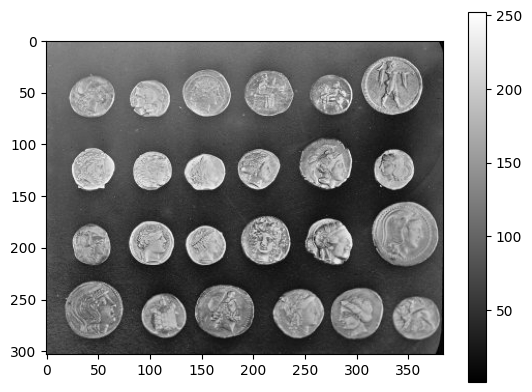

In [302]:
# segment the coins
im = data.coins()
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

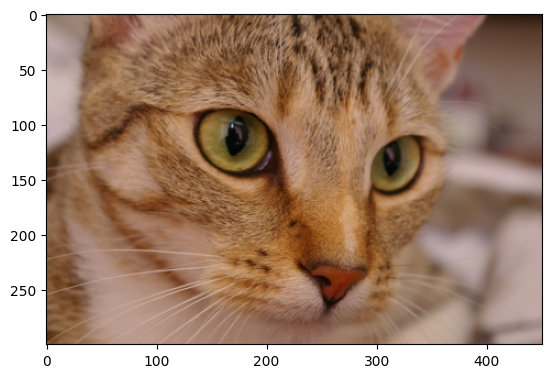

In [303]:
# detect the eyes / nose
im = data.chelsea()
plt.imshow(im);


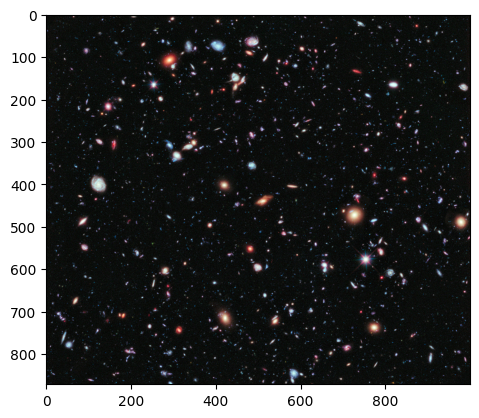

In [304]:
# counting the galaxies
im = data.hubble_deep_field()
plt.imshow(im);

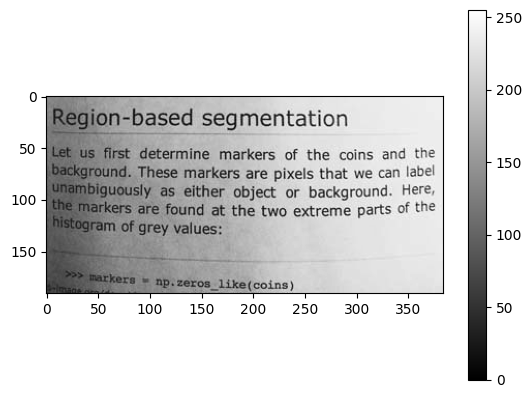

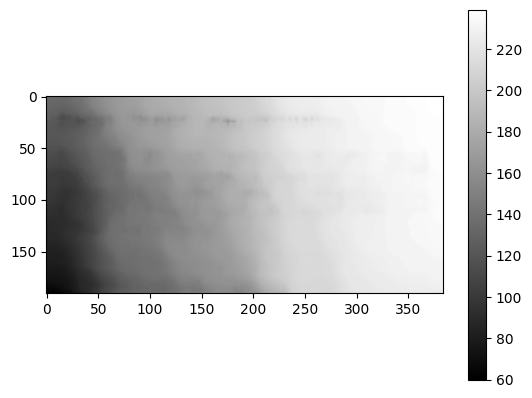

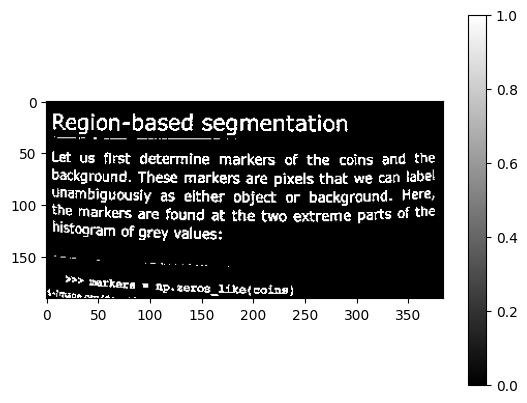

In [305]:
im = data.page()

bg = skr.median(im, disk(10))

res = (1.*im/bg) < .8

plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();
plt.figure()
plt.imshow(bg,cmap=plt.cm.gray);
plt.colorbar()
plt.figure()
plt.imshow(res.astype(np.uint8),cmap=plt.cm.gray);
plt.colorbar();


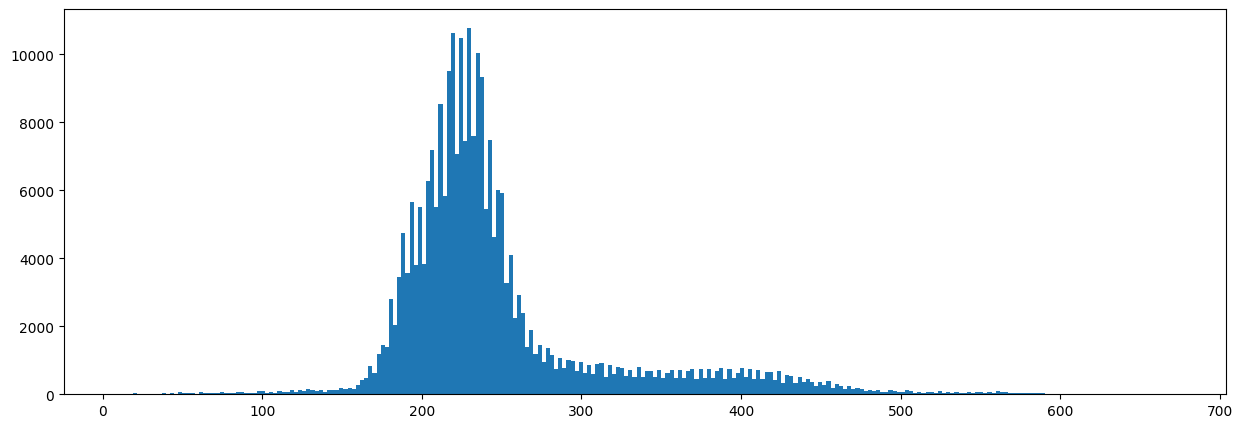

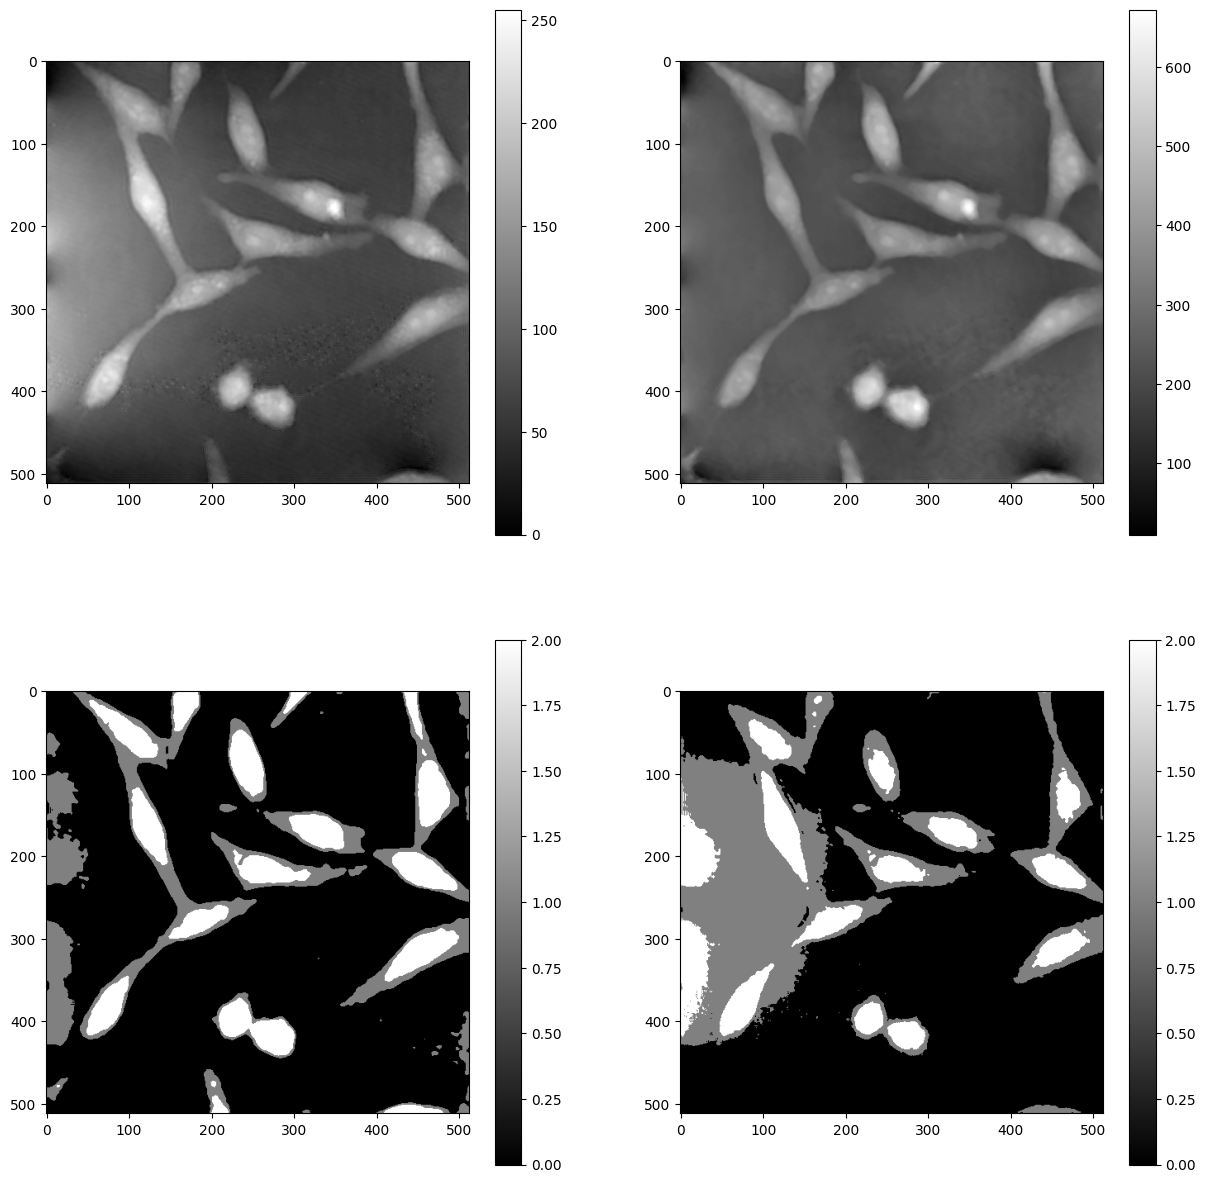

In [306]:
# segment the cells
im = imread('../data/dh_phase.png')
th1 = im>150
th2 = im>100

previous = 1.*th1+th2

im_gauss = gaussian(im, sigma=40)
# im_morpho = skr.minimum(im_gauss, disk(20))

im_even = (1.*im/im_gauss)
im_even = skr.median(im_even.astype('uint16'), disk(3))

th1 = im_even>260
th2 = im_even>350

result = 1.*th1 + th2

def show():
    h, bins = np.histogram(im_even.flatten(), bins=256)
    plt.figure(figsize=(15,5))
    plt.bar(bins[:-1], h, bins[1] - bins[0])
    plt.show()

    plt.figure(figsize=[15,15])
    plt.subplot(2,2,1)
    plt.imshow(im,cmap=plt.cm.gray)
    plt.colorbar()
    plt.subplot(2,2,2)
    plt.imshow(im_even,cmap=plt.cm.gray)
    plt.colorbar()
    plt.subplot(2,2,3)
    plt.imshow(result,cmap=plt.cm.gray)
    plt.colorbar()
    plt.subplot(2,2,4)
    plt.imshow(previous,cmap=plt.cm.gray)
    plt.colorbar()
    plt.show()

show()

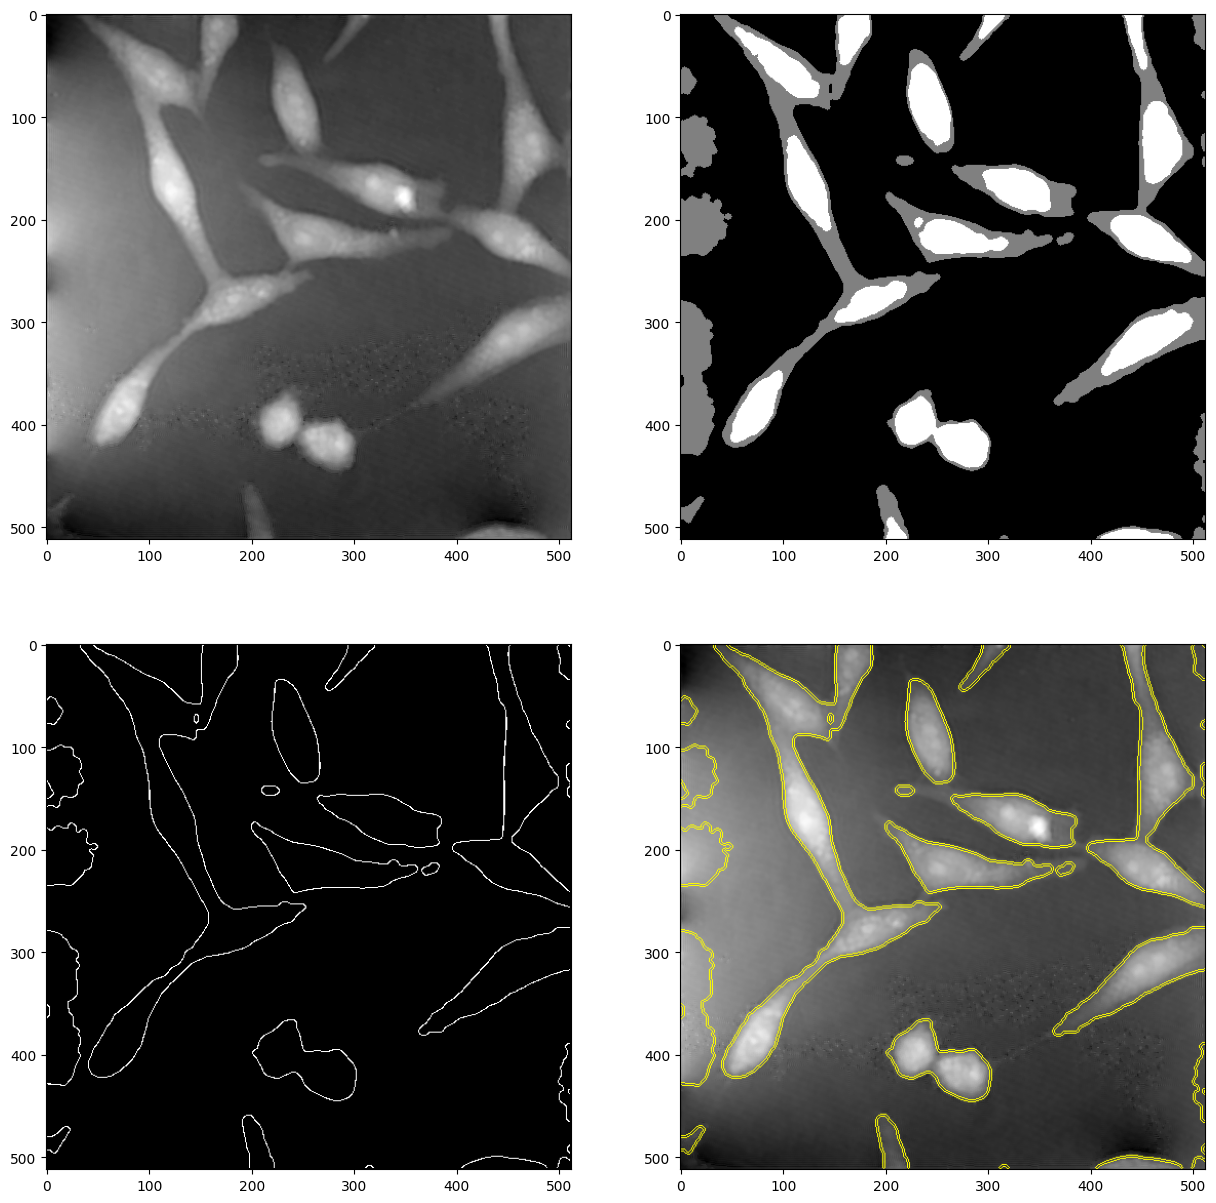

In [307]:
from scipy.ndimage import distance_transform_edt

# Canny edge
copy = result.copy().astype('uint8')
copy = skr.maximum(skr.minimum(copy, disk(3)), disk(3))
im_canny = canny(copy>0)

def show_canny():
    plt.figure(figsize=[15,15])
    plt.subplot(2,2,1)
    plt.imshow(im, cmap=plt.cm.gray)
    plt.subplot(2,2,2)
    plt.imshow(copy, cmap=plt.cm.gray)
    plt.subplot(2,2,3)
    plt.imshow(im_canny, cmap=plt.cm.gray)
    plt.subplot(2,2,4)
    plt.imshow(mark_boundaries(im,im_canny))

show_canny()

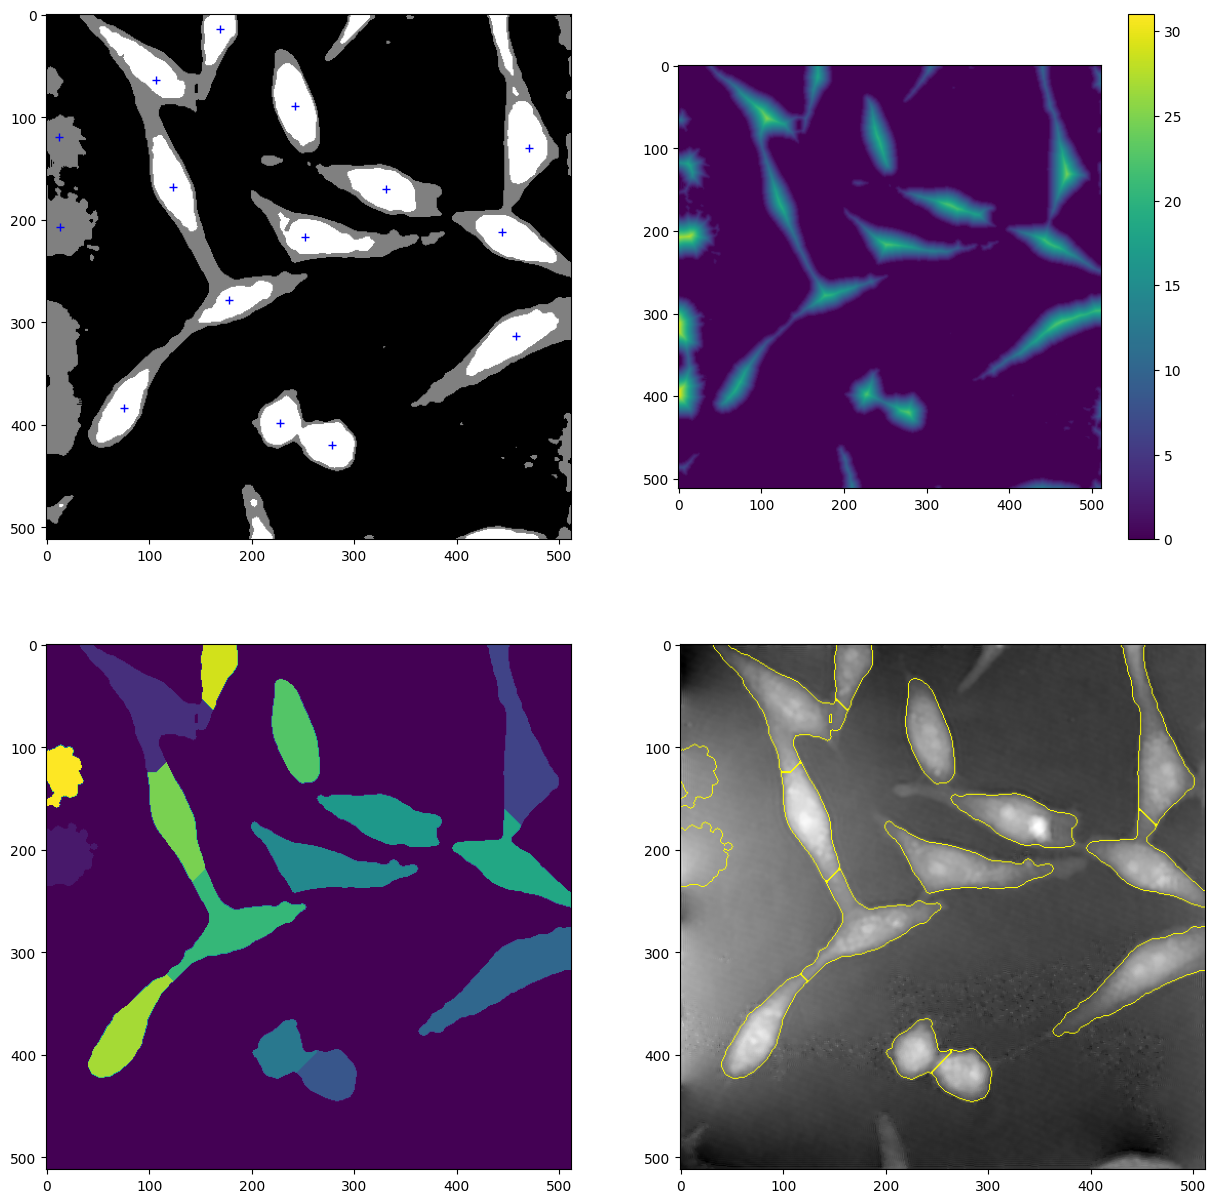

In [308]:
# Distance transform
copy = result.copy().astype('uint8')
copy = skr.maximum(skr.minimum(copy, disk(3)), disk(3))

distance = distance_transform_edt(result)

markers_coordinates = peak_local_max(distance, threshold_rel=0.5, min_distance=10)

markers = np.zeros_like(im)
for i,(row,col) in enumerate(markers_coordinates):
    markers[row,col] = i+1

ws = watershed(copy>0, markers, mask=copy>0)

def show_canny():
    plt.figure(figsize=[15,15])
    plt.subplot(2,2,1)
    plt.imshow(result, cmap=plt.cm.gray)
    markers = peak_local_max(distance, threshold_rel=0.5, min_distance=10)
    plt.plot(markers[:,1],markers[:,0],'b+')
    plt.subplot(2,2,2)
    plt.imshow(distance)
    plt.colorbar()
    plt.subplot(2,2,3)
    plt.imshow(ws)
    plt.subplot(2,2,4)
    plt.imshow(mark_boundaries(im,ws))
    plt.show()

show_canny()

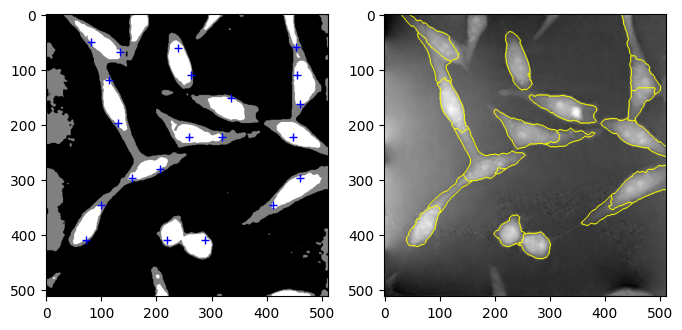

In [309]:
# Watershed transform
dist = 50
markers_coordinates = peak_local_max(result, threshold_rel=0.99, min_distance=dist)

markers = np.zeros_like(result)
for i,(row,col) in enumerate(markers_coordinates):
    markers[row,col] = i+1

copy = (result*2).astype('uint8')

gr = skr.gradient(copy,disk(3))
ws = watershed(gr, markers)

def show_markers():
    plt.figure(figsize=[8,8])
    plt.subplot(1,2,1)
    plt.imshow(result, cmap=plt.cm.gray)
    markers = peak_local_max(result, threshold_rel=0.99, min_distance=dist)
    plt.plot(markers[:,1],markers[:,0],'b+')
    plt.subplot(1,2,2)
    plt.imshow(mark_boundaries(im, ws))
    plt.show()

show_markers()

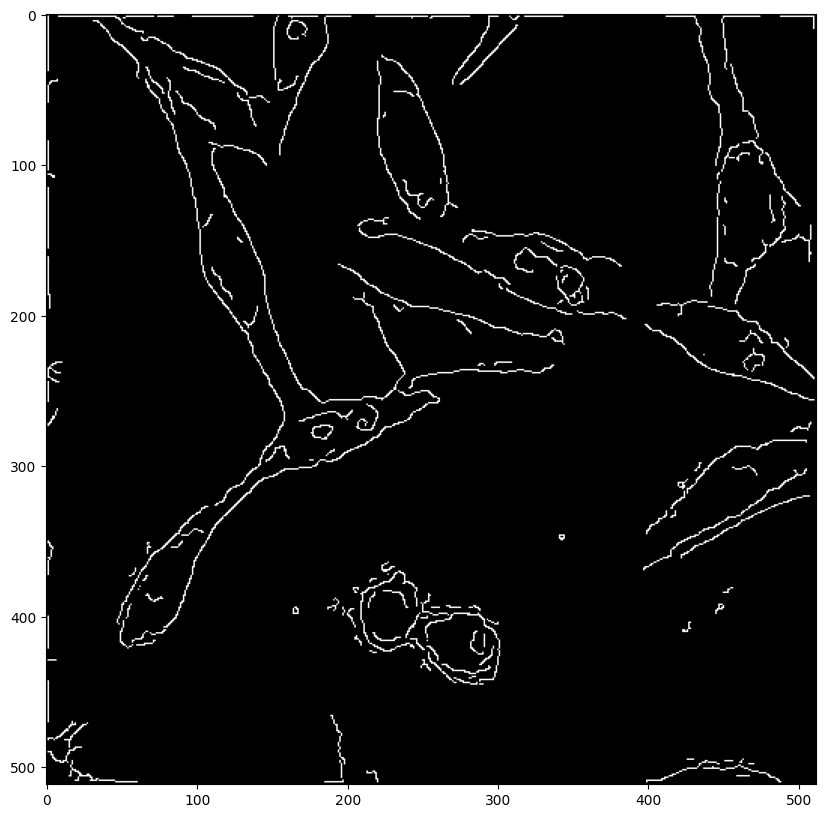

In [310]:
from skimage.feature import canny


ca = canny(im)

plt.figure(figsize=[10,10])
plt.imshow(ca,cmap=plt.cm.gray);

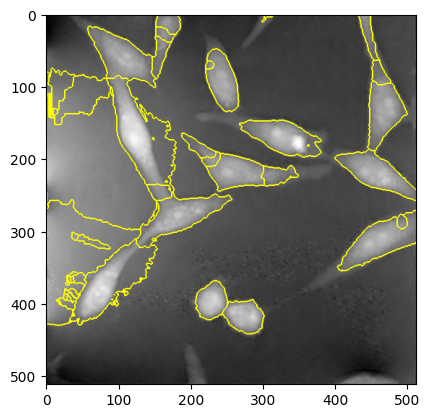

In [311]:
from skimage.segmentation import mark_boundaries, watershed

th1 = im>150
th2 = im>100

lab,n_lab = label(th1,return_num=True)
bg = th2==0
lab[bg] = n_lab+1

#med = skr.median(im,disk(5))
#gr = skr.gradient(med,disk(3))

ws = watershed(255-im,lab)
plt.imshow(mark_boundaries(im,ws))


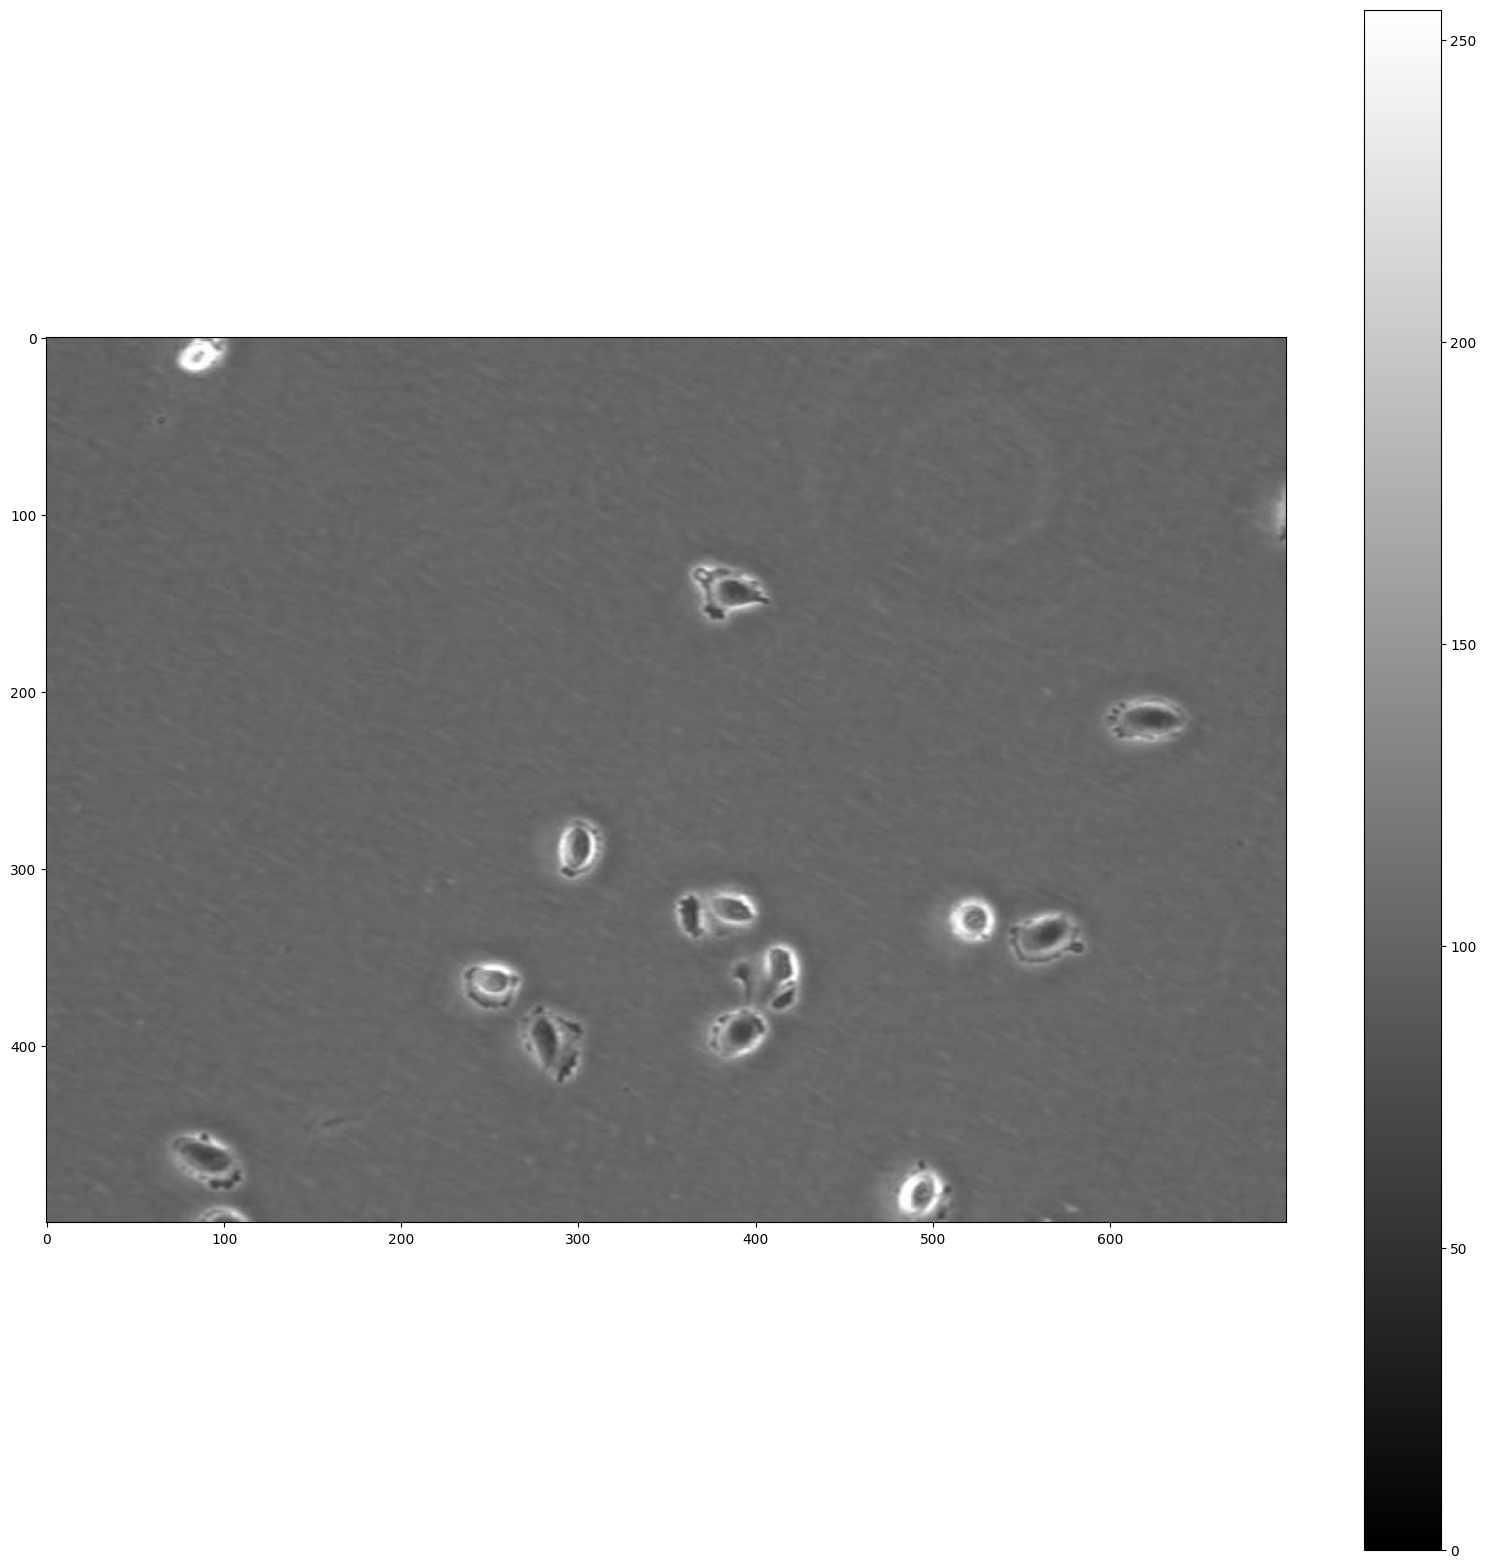

In [312]:
im = imread('../data/exp0001.jpg')
plt.figure(figsize=[20,20])
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

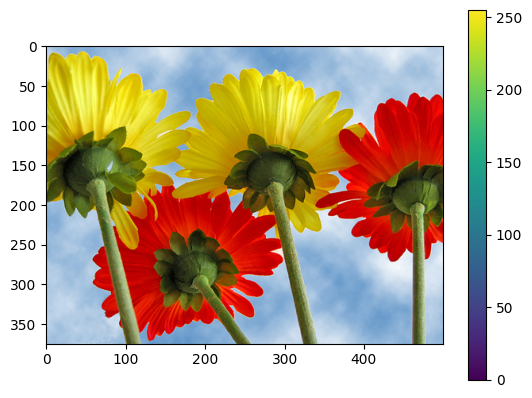

In [313]:
# count red and yellow flowers
im = imread('../data/flowers.jpg')
plt.imshow(im)
plt.colorbar();

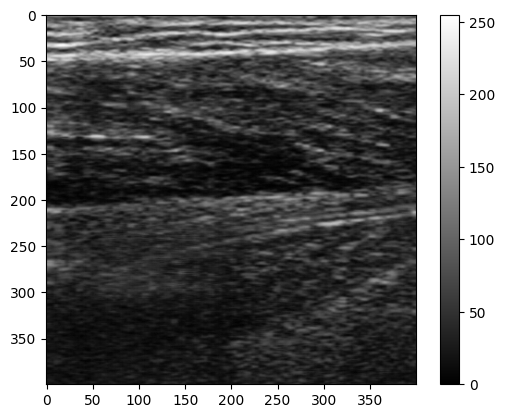

In [314]:
# find the fiber orientation
im = imread('../data/image4.png')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

In [315]:
from IPython.display import YouTubeVideo
YouTubeVideo('PUcz11MLxUk', start=0, autoplay=1, theme="light", color="blue",)

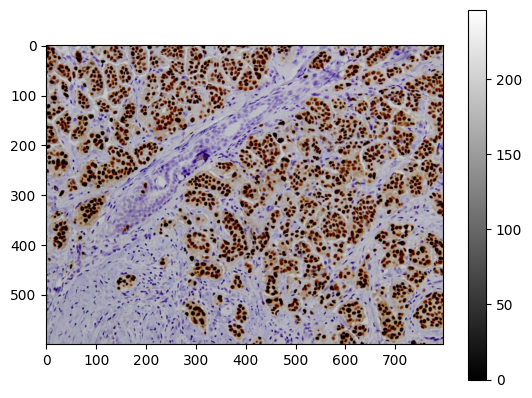

In [316]:
# detect stroma
im = imread('../data/Rp042826d.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

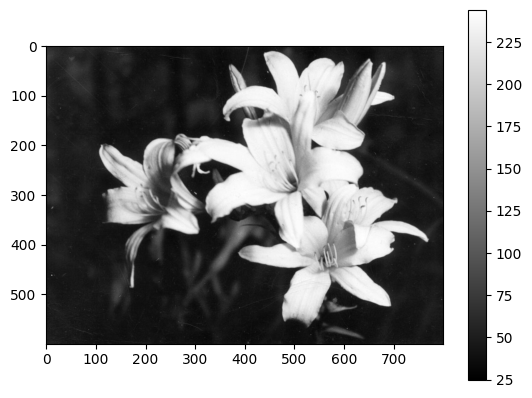

In [317]:
# segment the flowers
im = imread('../data/KaneFlowers.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

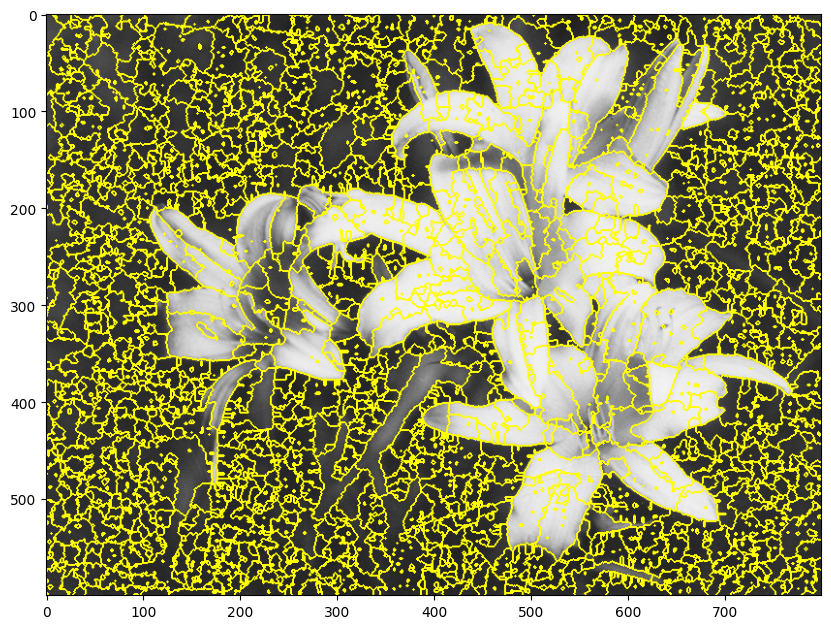

In [318]:
from skimage.segmentation import watershed
from skimage.segmentation import mark_boundaries

gr = skr.gradient(im,disk(3))

local_min = im <= skr.minimum(im,disk(5))

lab = label(local_min)

#med = skr.median(im,disk(5))

ws = watershed(gr,lab)

plt.figure(figsize=[10,10])
plt.imshow(mark_boundaries(im,ws))

#plt.imshow(local_min)


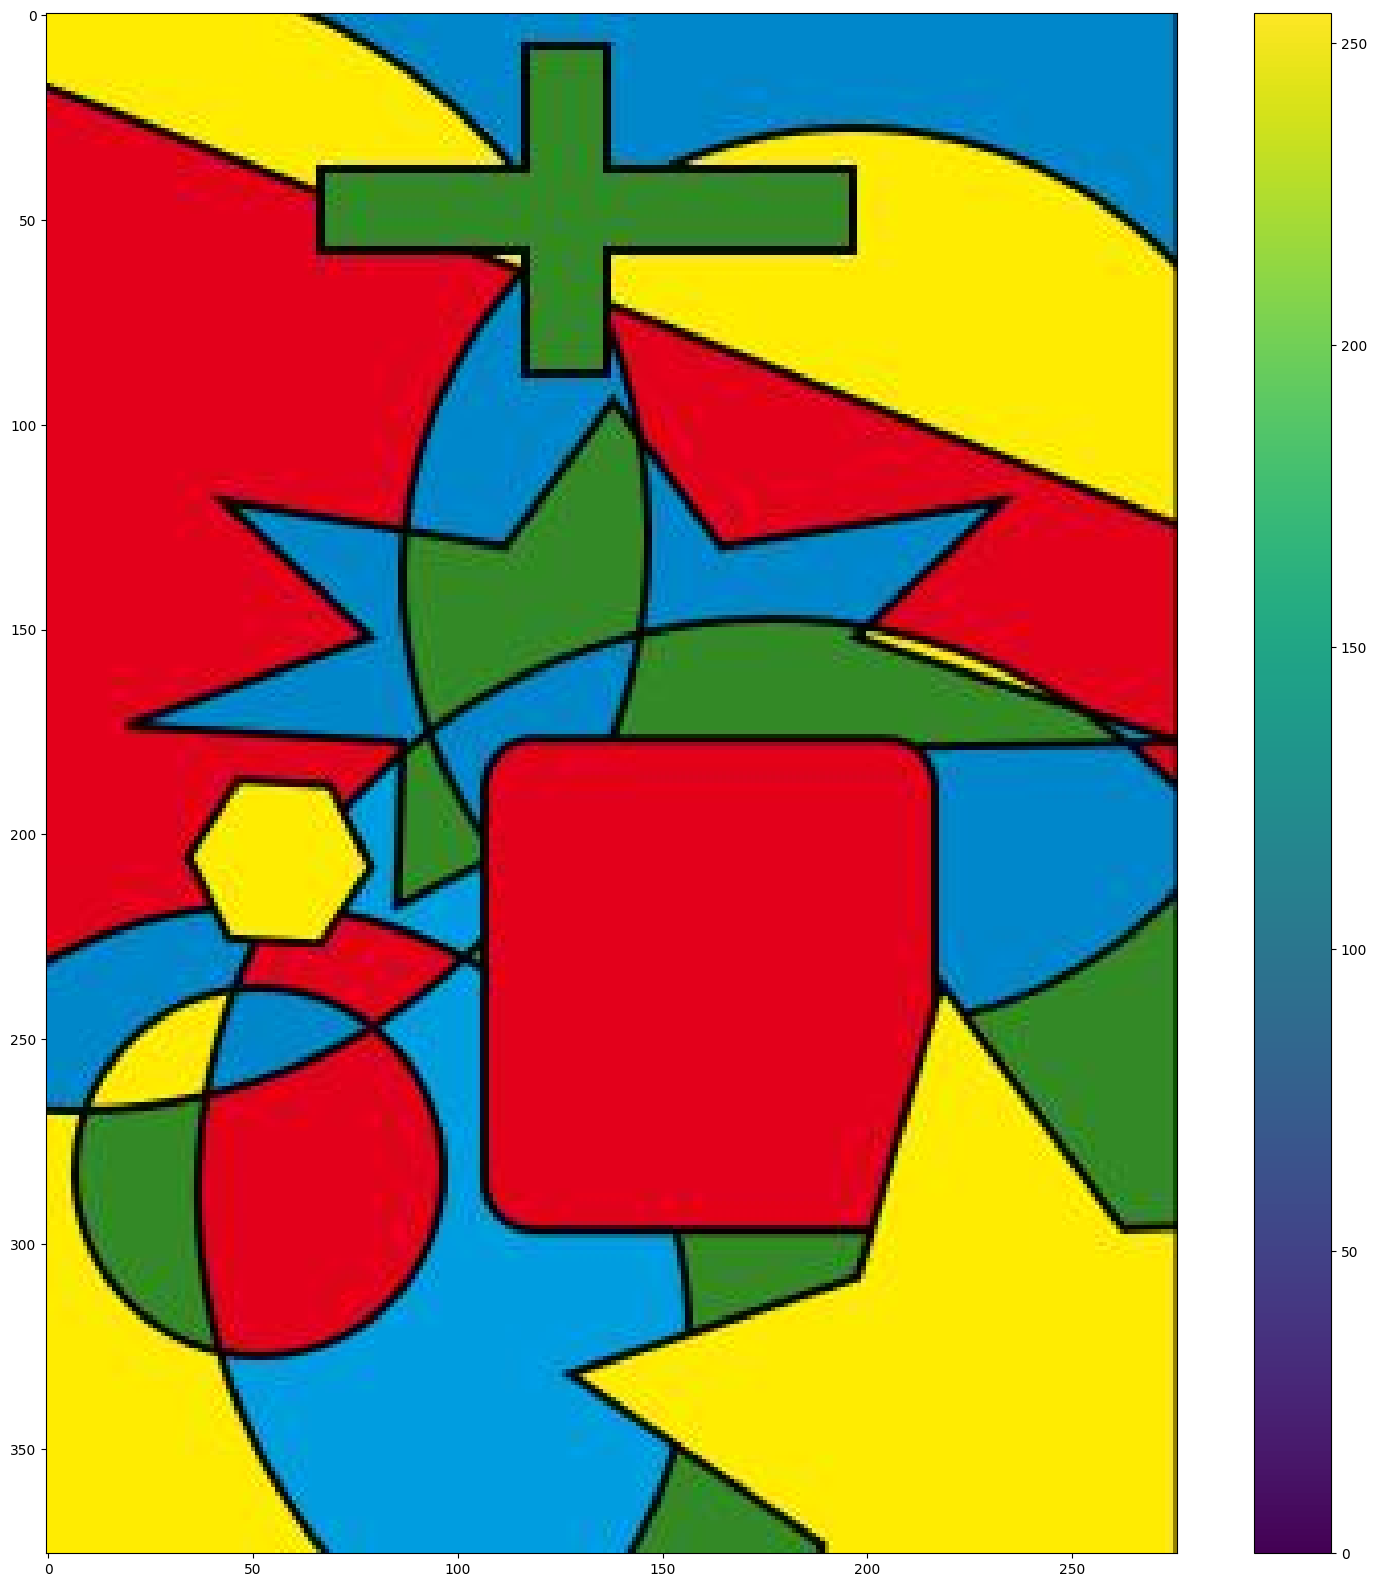

In [319]:
rgb = imread('../data/4colors.JPG')

plt.figure(figsize=[20,20])
plt.imshow(rgb)
plt.colorbar();

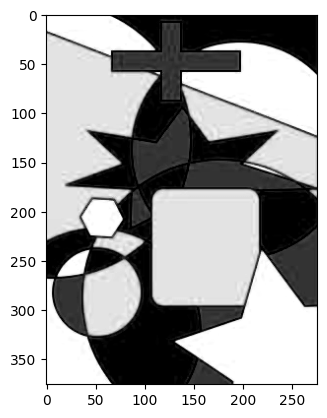

In [320]:
r = skr.median(rgb[:,:,0],disk(1))
plt.imshow(r,cmap=plt.cm.gray)

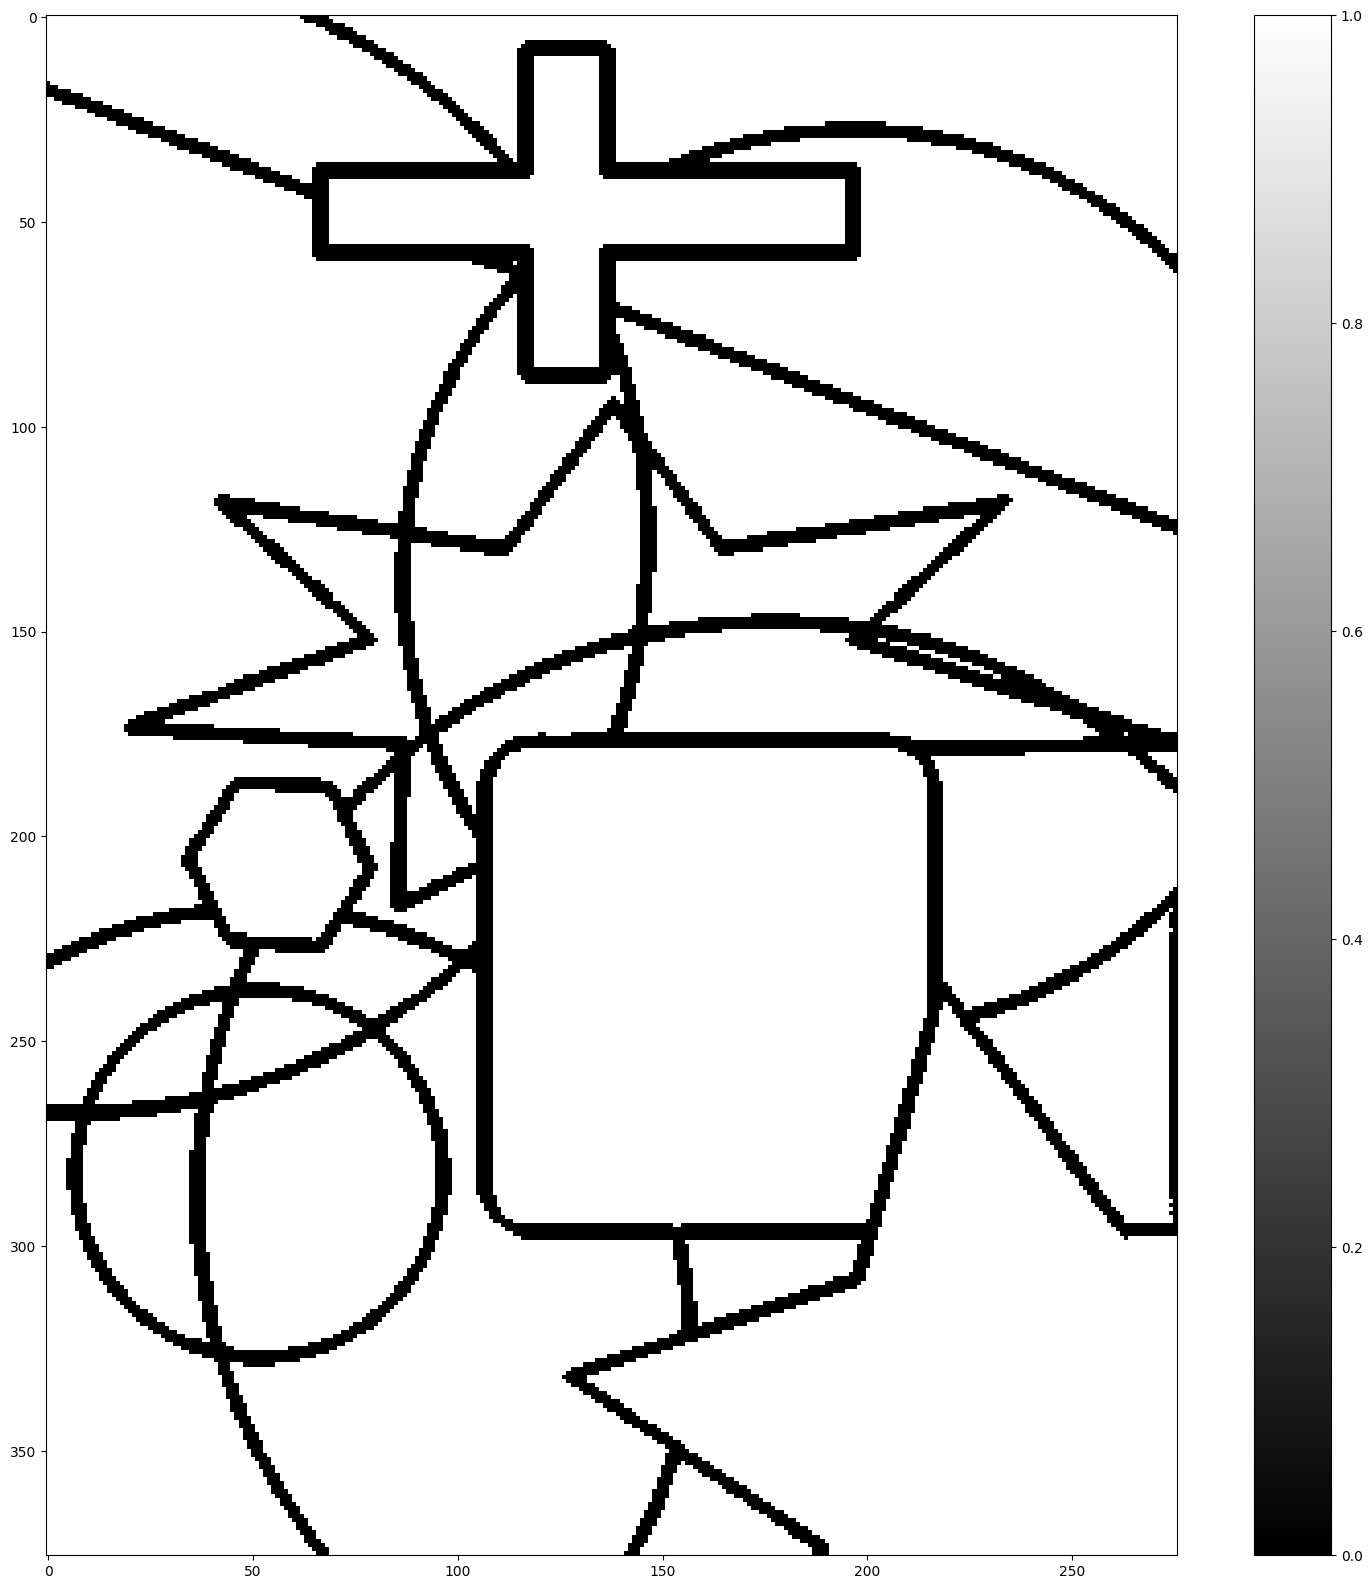

In [321]:
s = rgb.sum(axis=2)
th = s > 100

#post-processing
pth = skr.minimum(th.astype(np.uint8),disk(1))

plt.figure(figsize=[20,20])
plt.imshow(pth,cmap=plt.cm.gray)
plt.colorbar()

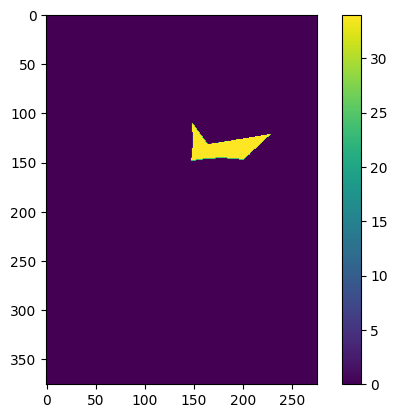

In [339]:
lab = label(pth)

lut = np.arange(0,np.max(lab)+1)

plt.imshow(lab)
plt.colorbar()

mask = lab == 10
plt.imshow(mask)

In [323]:
from random import shuffle
shuffle(lut)

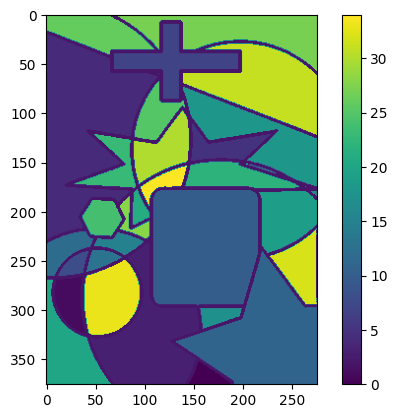

In [324]:
shuffle(lut)
plt.imshow(lut[lab])
plt.colorbar()

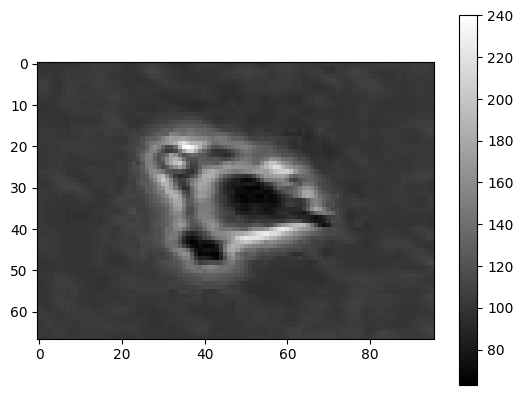

In [325]:
# segment the cell
im = imread('../data/exp0001crop.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

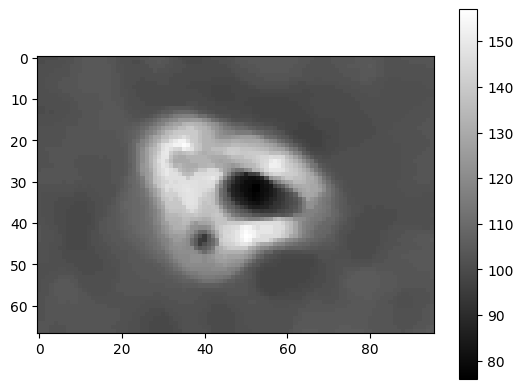

In [326]:
m = skr.median(im,disk(5))
plt.imshow(m,cmap=plt.cm.gray)
plt.colorbar()

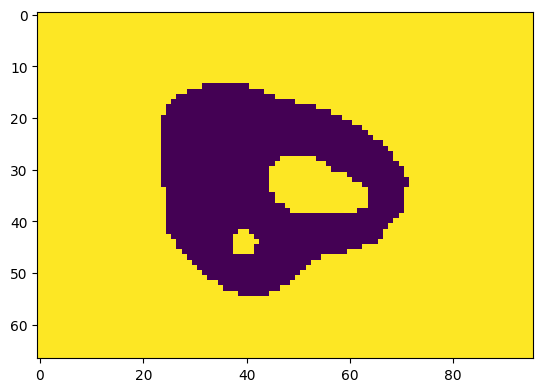

In [327]:
th1 = m < 90

th2 = np.bitwise_and(110 > m,m < 130)

plt.imshow(th2)

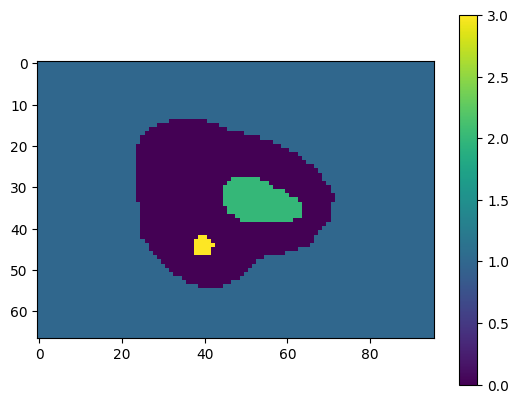

In [328]:
markers = label(th2)
plt.imshow(markers)
plt.colorbar()

In [329]:
markers[markers==3] = 2
ws = watershed(im,markers)

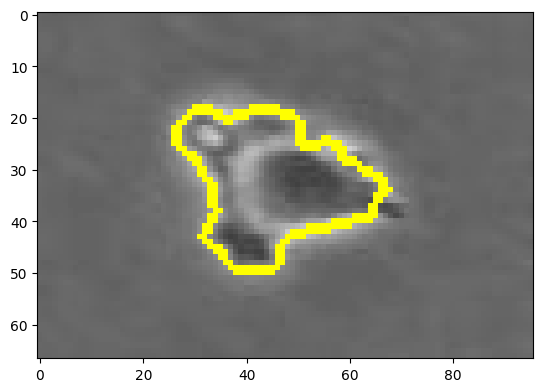

In [330]:
plt.imshow(ws)
plt.imshow(mark_boundaries(im,ws))

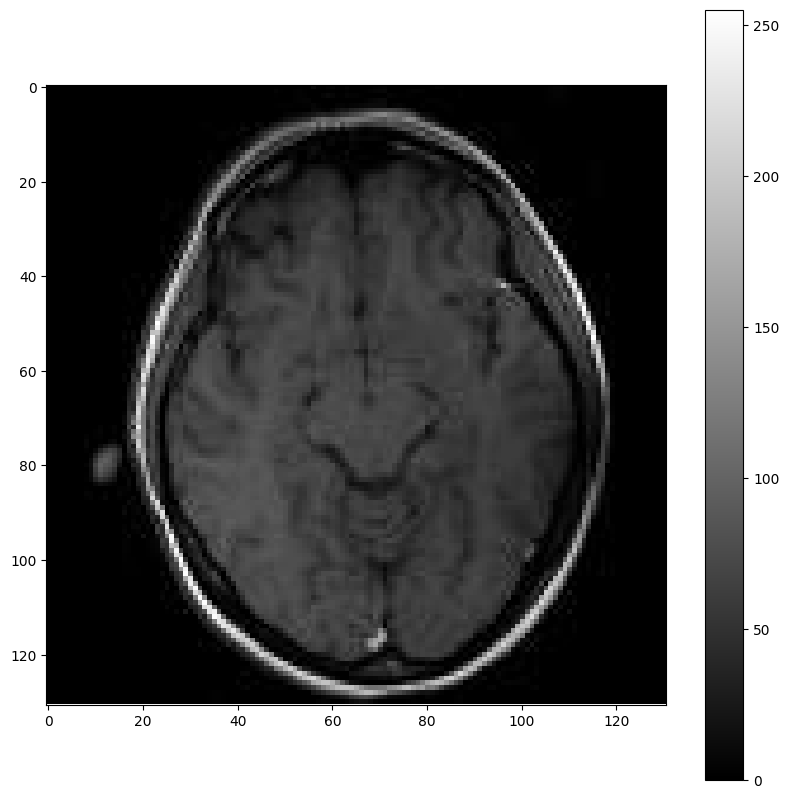

In [331]:
# segment the cell
im = imread('../data/brain.jpg')[:,:,0]
plt.figure(figsize=(10,10))
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

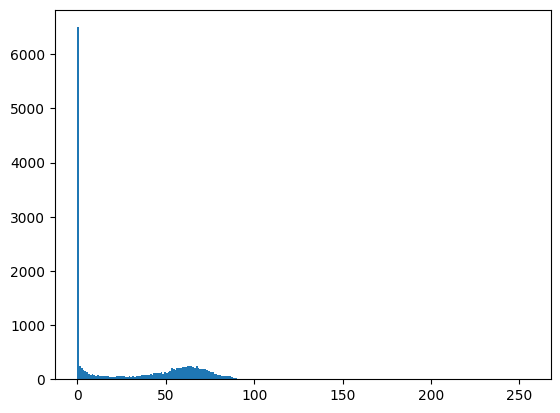

In [332]:
plt.hist(im.flatten(),255);

In [333]:
from skimage.filters import threshold_otsu

t_otsu = threshold_otsu(im)
t_otsu

36

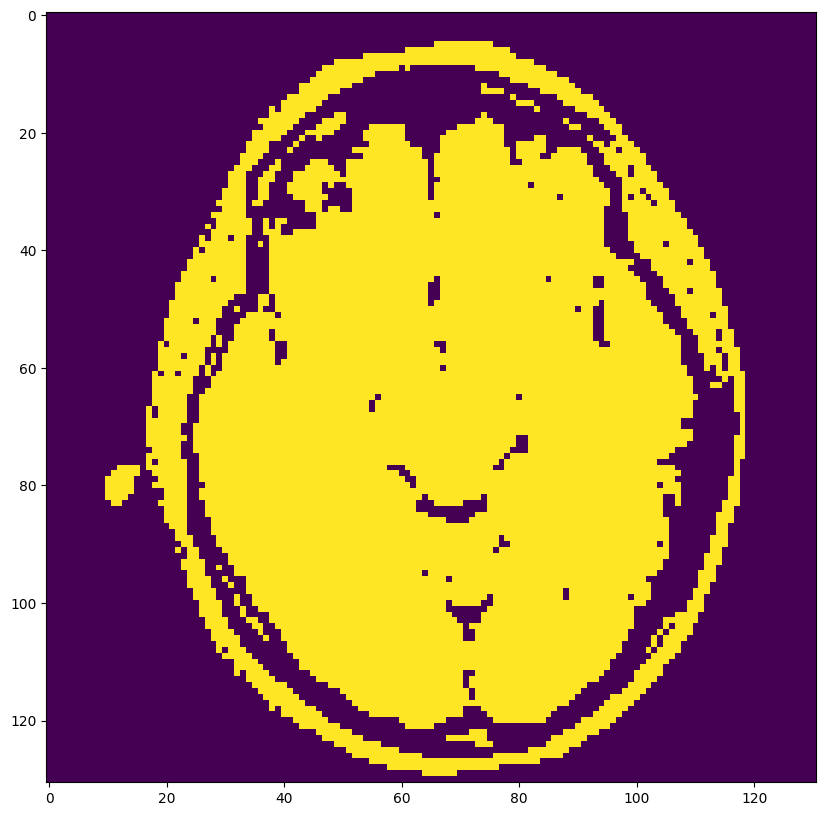

In [334]:
th = im > t_otsu
plt.figure(figsize=(10,10))
plt.imshow(th)

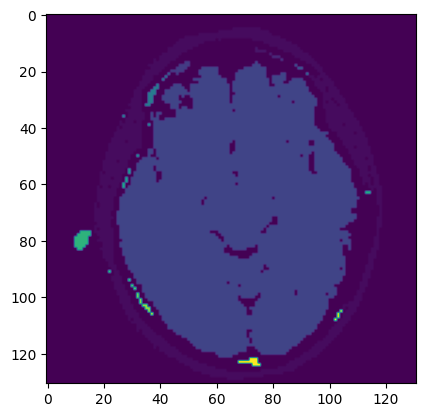

In [335]:
lab = label(th,connectivity=1)
plt.imshow(lab)

In [336]:
from skimage.measure import regionprops

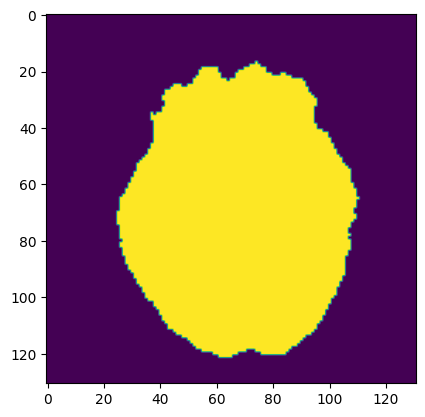

In [337]:
props = regionprops(lab)

brain = (lab==7).astype(np.uint8)

pp = skr.maximum(brain,disk(3))
pp = skr.minimum(pp,disk(3))

plt.imshow(pp)

In [338]:
for p in props:
    print(p.area, p.label)

1459 1
5 2
1 3
3 4
1 5
16 6
6323 7
1 8
2 9
1 10
1 11
1 12
1 13
16 14
1 15
1 16
1 17
2 18
2 19
2 20
2 21
30 22
1 23
1 24
1 25
1 26
2 27
2 28
5 29
1 30
1 31
2 32
1 33
13 34
